Como produto final, você deve entregar:

- um arquivo csv no as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: 

(x) id da escola;

(x) nome da escola;

(x) tipo da escola (EM, CIEP ou colégio);

(x) logradouro da entrega;

(x) número (O logradouro da escola deve estar em uma coluna diferente do número;);

(x) bairro;

() subprefeitura;

(x) latitude;

(x) longitude;

() quantidade de material didático que deve ser entregue;


- um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

Como padrão dos dados, considere:

(X) nome das colunas em snake_case

(X) strings não devem conter acentos

(X) todas as strings devem estar em maiúsculo

(X) padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)

(X) latitude e longitude devem conter apenas 5 casas decimais

(X) os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

In [5]:
# bibliotecas necessarias para o projeto
import pandas as pd
import numpy as np
import math
from unidecode import unidecode

### Tratando os DFs

In [6]:
# importando df escolas para checar as particularidades do df
df_escolas = pd.read_csv("escolas.csv", delimiter=",")
display(df_escolas)

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,"-22,994124","-43,593683"


Com uma primeira olhada no dataset, conseguimos ver algumas coisas que não estão padronizadas, como o nome das colunas, diferenças entre registros (maiúsculos e minúsculos) e registros de id duplicados. Os IDs duplicados mostram que a mesma escola está aparecendo mais de uma vez no dataset. 

Juntando a isso, já vamos ajustar o ID para ficar como strings de 3 números, como foi pedido.

In [7]:
df_escolas[df_escolas.duplicated('id')]

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
15,413,EM CÓCIO BARCELOS,COPACABANA,"R. Barão de Ipanema, 34","-22,74828","-43,189063"
20,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
25,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"
40,660,E.M NOSSA SENHORA DA POMPÉIA,TODOS OS SANTOS,"R. Cirne Maia, 109","-22,892031","-43,279925"
57,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"
60,388,EM CARDEAL CAMARA,PARADA DE LUCAS,"R. Anamá, 98","-22,81527","-43,303566"
78,90,EM THOMAS JEFFERSON,ACARI,Avenida Pastor Martin Luther King Jr S/Nº,"-22,81631","-43,340149"
80,69,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,"-22,876082","-43,343369"
84,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"
109,520,EM BARONESA DE SAAVEDRA,REALENGO,"R. Mal. Bibiano Costalat, 483-639","-22,87185","-43,432432"


In [8]:
# ajustando nomes de colunas e fazendo um drop nos ids duplicados que existem dentro do dataframe
df_escolas = df_escolas.rename(columns={'Escolas_Postos': 'nome_escola', 
                                        "BAIRRO": "bairro", 
                                        "ENDEREÇO ": "logradouro",
                                        "lat": "latitude",
                                        "lon": "longitude"})

df_escolas = df_escolas.drop_duplicates(subset=['id'])

# ajustando os ids para strings de 3 valores  
df_escolas['id'] = df_escolas['id'].apply(lambda x: '{:03d}'.format(x))
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
146,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,Rua Belchior Da Fonseca 643,"-23,001416","-43,638757"
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"


Já podemos perceber que os dados diminuiram de 152 para 136 com os ajustes dos ids. Além disso, já é visível a padronização no nome das colunas.

Agora, vamos ajustar as colunas com texto, padronizando-as para ficarem sem acento, caracteres especiais e todas maiúsculas. Além disso, criaremos a coluna tipo_escola, que retira da string nome_escola se o tipo é CIEP, EM ou COLEGIO.

In [9]:
def unicode_upper(df, column):
    # função para padronizar strings a partir do unicode e transformando-as em maiúsculo com o método .upper()
    df[f'{column}'] = df[f'{column}'].apply(lambda x: unidecode(x).upper())

unicode_upper(df_escolas, "bairro")
unicode_upper(df_escolas, "logradouro")
unicode_upper(df_escolas, "nome_escola")

# extraindo da string nome_escola os tipos de escola encontrados nos registros do dataset com regex
df_escolas[['tipo_escola', 'nome_escola']] = df_escolas['nome_escola'].str.extract(
    r'(^(?:EM|E\.M\.|E.M|COLEGIO MUNICIPAL|ESCOLA MUNICIPAL|CIEP|CENTRO INTEGRADO DE EDUCACAO PUBLICA - ESTADO|CENTRO INTEGRADO DE EDUCACAO PUBLICA)?)\s*(.+)',
      expand=True)

# a partir desses registros apresentados na extração, transformamos as ocorrências em 3 tipos: "EM", "CIEP" e "COLEGIO"
df_escolas.loc[df_escolas["tipo_escola"].isin(["EM", "E.M.", "EM.", "E.M", "ESCOLA MUNICIPAL"]), "tipo_escola"] = "EM"
df_escolas.loc[df_escolas["tipo_escola"].isin(["CIEP", "CENTRO INTEGRADO DE EDUCACAO PUBLICA - ESTADO", 
                                               "CENTRO INTEGRADO DE EDUCACAO PUBLICA"]), "tipo_escola"] = "CIEP"
df_escolas.loc[df_escolas["tipo_escola"].isin(["COLEGIO MUNICIPAL"]), "tipo_escola"] = "COLEGIO"

display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola
0,178,HENFIL,CAJU,RUA CARLOS SEIDL S/NO,"-22,880888","-43,225326",CIEP
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",EM
2,483,CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579",EM
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456",EM
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",EM
...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",EM
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,"-22,98046","-43,643545",EM
148,301,JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO","-22,953163","-43,577409",EM
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,"-23,009084","-43,537582",EM


O dataframe está bem mais agradável aos olhos com essas alterações, mas ainda vamos ajustar mais coisas. Quando olhamos para o logradouro, vemos que não há padronização nos endereços. Vamos ajustar isso com a ajuda de um dicionario e com regex novamente.

E, para finalizar com a manipulação de strings, vamos criar a coluna numero_logradouro para separar os números dos endereços informados:

In [10]:
# Mapear abreviações para termos completos
mapeamento            = {'R':  'RUA', 
                         'AV': 'AVENIDA', 
                         'P':  'PRACA', 
                         'T':  'TRAVESSA',
                         'C':  'CAMINHO',
                         'E':  'ESTRADA'}
# Aplicar a substituição no DataFrame
for key, value in mapeamento.items():
    df_escolas['logradouro'] = df_escolas['logradouro'].replace(rf'^({key}. | {key})', f'{value} ', regex=True)

df_escolas['numero_logradouro'] = df_escolas['logradouro'].str.extract(r'(\d+(?:\.\d+)?|S/N.O|SN|S/N|S/NO)$')
df_escolas['logradouro'] = df_escolas['logradouro'].str.replace(r'(\d+(?:\.\d+)?|S/N.O|SN|S/N|S/NO)$', '', regex=True)
df_escolas['logradouro'] = df_escolas['logradouro'].replace(r',\s*$', '', regex=True)
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,"-22,880888","-43,225326",CIEP,S/NO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,"-22,889574","-43,236202",EM,187
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,"-22,909293","-43,183579",EM,56
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,"-22,897629","-43,227456",EM,20
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,"-22,924412","-43,208579",EM,45
...,...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA,"-23,001416","-43,638757",EM,643
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA,"-22,98046","-43,643545",EM,9.183
148,301,JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO,"-22,953163","-43,577409",EM,S/NO
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO,"-23,009084","-43,537582",EM,S/N.O


Agora, para finalizar a limpeza do dataset, vamos padronziar as colunas latitude e longitude para virarem numericas e com 5 casas decimais apenas:

In [11]:
# tratando os dados das colunas lat e lon e trocando seus tipos
def clean_lat_lon(df, column):
    df[f"{column}"] = df[f"{column}"].str.replace(",", ".")
    df[f"{column}"] = pd.to_numeric(df[f"{column}"], errors='coerce')
    df[f"{column}"] = df[f"{column}"].apply(lambda x: round(x, 5))

clean_lat_lon(df_escolas, "latitude")
clean_lat_lon(df_escolas, "longitude")
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 150
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 136 non-null    object 
 1   nome_escola        136 non-null    object 
 2   bairro             136 non-null    object 
 3   logradouro         136 non-null    object 
 4   latitude           136 non-null    float64
 5   longitude          136 non-null    float64
 6   tipo_escola        136 non-null    object 
 7   numero_logradouro  120 non-null    object 
dtypes: float64(2), object(6)
memory usage: 9.6+ KB


In [12]:
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,-22.88089,-43.22533,CIEP,S/NO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,-22.88957,-43.23620,EM,187
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,-22.90929,-43.18358,EM,56
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,-22.89763,-43.22746,EM,20
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,-22.92441,-43.20858,EM,45
...,...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA,-23.00142,-43.63876,EM,643
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA,-22.98046,-43.64355,EM,9.183
148,301,JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO,-22.95316,-43.57741,EM,S/NO
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO,-23.00908,-43.53758,EM,S/N.O


### Parte do otimizador

In [13]:
# criando um novo df com colunas necessarias para rodar o otimizador
df = df_escolas[["id", "latitude", "longitude"]]

In [14]:
df.head()

,id,latitude,longitude
0,178,-22.88089,-43.22533
1,634,-22.88957,-43.23620
2,483,-22.90929,-43.18358
3,476,-22.89763,-43.22746
4,132,-22.92441,-43.20858


In [15]:
pontos_entrega = list(zip(df.latitude, df.longitude))


def distance(point1, point2):
    """
    Calcula a distância entre dois pontos geográficos, usando a fórmula de Haversine.
    """
    lat1, lon1 = point1
    lat2, lon2 = point2
    R = 6371  # raio da Terra em quilômetros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = (
        math.sin(delta_phi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d


def nearest_neighbor(points):
    unvisited = set(
        range(1, len(points))
    )  # índices que representam os pontos não visitados
    current_point = 0
    route = [current_point]

    while unvisited:
        nearest = min(
            unvisited, key=lambda x: distance(points[current_point], points[x])
        )
        route.append(nearest)
        unvisited.remove(nearest)
        current_point = nearest

    route.append(0)  # Volta ao ponto inicial para fechar o ciclo
    return route


# Exemplo de lista de pontos (latitude, longitude)
# pontos_entrega = [(lat1, lon1), (lat2, lon2), ...]  # Substitua pelos seus pontos

best_route = nearest_neighbor(pontos_entrega)
print("Melhor rota:", best_route)


Melhor rota: [0, 1, 8, 3, 27, 28, 20, 26, 25, 24, 21, 23, 39, 41, 47, 43, 48, 62, 60, 57, 61, 59, 55, 51, 56, 53, 54, 58, 50, 73, 75, 45, 49, 64, 67, 81, 78, 72, 77, 63, 79, 90, 80, 101, 71, 69, 70, 68, 99, 76, 104, 106, 107, 89, 93, 92, 82, 83, 91, 88, 94, 85, 30, 29, 32, 15, 5, 14, 13, 17, 12, 19, 11, 2, 6, 7, 22, 9, 4, 18, 16, 10, 36, 37, 31, 42, 44, 46, 33, 40, 35, 34, 38, 74, 66, 65, 100, 103, 102, 105, 97, 98, 95, 96, 114, 110, 117, 108, 109, 116, 52, 111, 115, 112, 122, 127, 118, 120, 124, 121, 128, 123, 130, 129, 132, 131, 135, 133, 113, 87, 84, 134, 86, 126, 119, 125, 0]


In [16]:
df_sorted = df_escolas.sort_values(by='id', key=lambda x: x.map({id: i for i, id in enumerate(best_route)}))

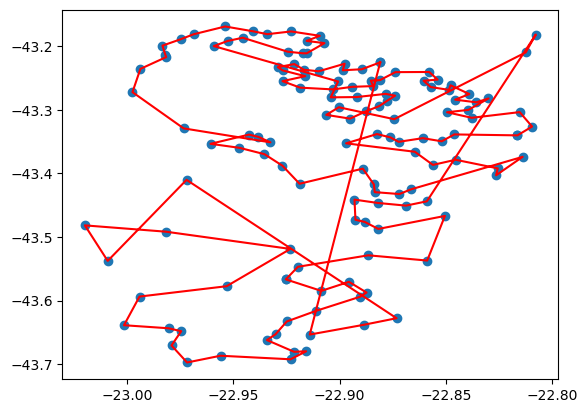

In [17]:
import matplotlib.pyplot as plt

# Descompacte os pontos de entrega em duas listas: latitudes e longitudes
latitudes, longitudes = zip(*[pontos_entrega[i] for i in best_route])

# Crie um gráfico de dispersão para os pontos de entrega
plt.scatter(latitudes, longitudes)

# Use 'plot' para desenhar a rota entre os pontos de entrega
plt.plot(latitudes, longitudes, 'r')

plt.show()


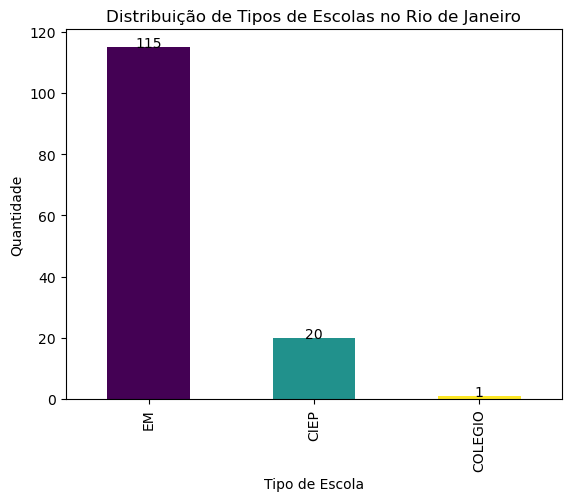

In [30]:


# Contar a quantidade de cada tipo de escola
contagem_escolas = df_escolas['tipo_escola'].value_counts()

# Criar um array de cores
cores = plt.cm.viridis(np.linspace(0, 1, len(contagem_escolas)))

# Criar um gráfico de barras com os dados e cores
contagem_escolas.plot(kind='bar', color=cores)

# Adicionar títulos e rótulos
plt.title('Distribuição de Tipos de Escolas no Rio de Janeiro')
plt.xlabel('Tipo de Escola')
plt.ylabel('Quantidade')

# Adicionar a quantidade em cada barra
for i in range(len(contagem_escolas)):
    plt.text(i, contagem_escolas[i], contagem_escolas[i], ha = 'center')

# Mostrar o gráfico
plt.show()


In [24]:
df_sorted.head()

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,-22.88089,-43.22533,CIEP,S/NO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,-22.88957,-43.23620,EM,187
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,-22.90929,-43.18358,EM,56
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,-22.89763,-43.22746,EM,20
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,-22.92441,-43.20858,EM,45


In [20]:
df_materiais = pd.read_csv("material_didatico.csv", delimiter=",")
df_materiais.head()

,id,Quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67


In [21]:
df_subprefeituras = pd.read_csv("subprefeituras.csv", delimiter=",")
df_subprefeituras.head()

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro
